In [1]:
#Use this code for faster jupyter notebook autocomplete
%config Completer.use_jedi = False

In [2]:
#Import necessary libraires
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load dataset
df = pd.read_csv('marketing_AB.csv')

In [4]:
#Check first few rows of dataset
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
#Check for duplicate values with respect to user id column
df.duplicated(subset='user id').sum()

0

In [6]:
#We are going to drop index number column and user id column becuase they will not be used for prediction anywhere 
df.drop(['Unnamed: 0','user id'],axis=1,inplace=True)

In [7]:
#Now we check dataframe again and see which columns are left for further analysis
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [8]:
#All columns, except total ads are categorical columns
#Here we check how many unique categories we have in each of these categorical columns

df_cat = df[['test group', 'converted', 'most ads day',
       'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [9]:
#We can also check what are these unique values from categorical columns
for i in df_cat.columns:
    print(i.upper(),":",df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate analysis

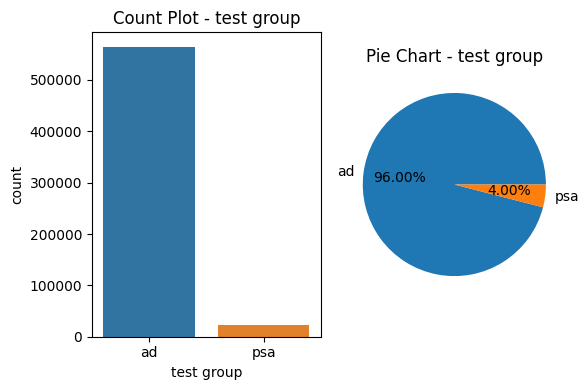

In [10]:
#Here we will analyse each variable separately
#Regarding that some variables have 2 unique values and some 7 (days in week) and 24 (hours in a day) we will plot them separately

variable='test group'

plt.figure(figsize=(6,4))
#Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f'Count Plot - {variable}')

#Pie chart
plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust layout 
plt.tight_layout()

#Show the plots
plt.show()


### In the upper diagram we see taht 96% of users so ad (advertisement) and that 4% of users saw psa (public service announcement)

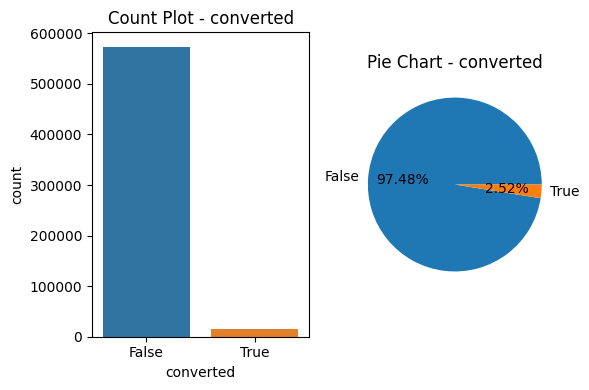

In [11]:
#Now we analyse and plot for variable converted

variable='converted'

plt.figure(figsize=(6,4))
#Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f'Count Plot - {variable}')

#Pie chart
plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust layout 
plt.tight_layout()

#Show the plots
plt.show()

### In the upper diagram we see that only 2.52% are converted so only 2.52% of users bought the product

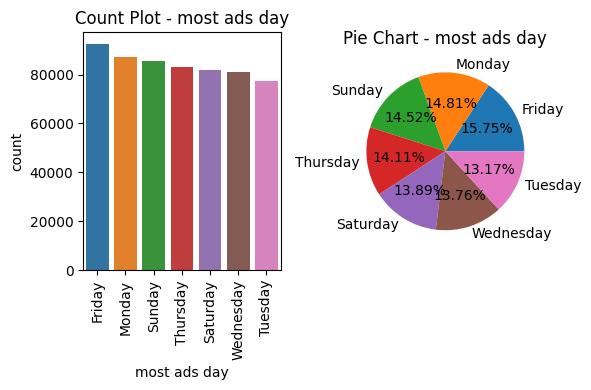

In [12]:
#Now we analyse and plot for variable most ads day

variable='most ads day'

plt.figure(figsize=(6,4))
#Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat, order=df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=90)

#Pie chart
plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust layout 
plt.tight_layout()

#Show the plots
plt.show()

### Most ads were shown to users on Friday

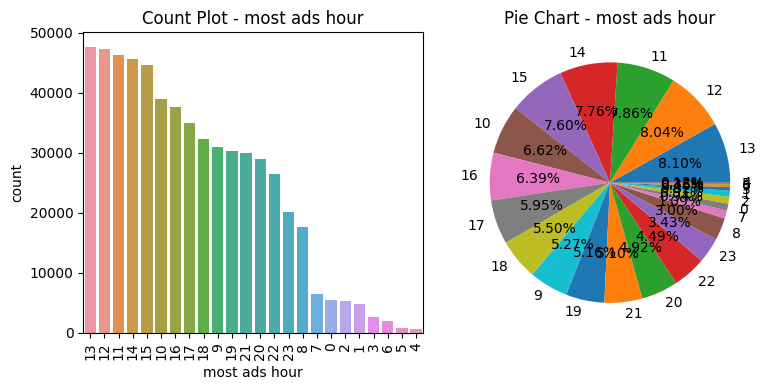

In [13]:
#Now we analyse and plot for variable most ads hour

variable='most ads hour'

plt.figure(figsize=(8,4))
#Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat, order=df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=90)

#Pie chart
plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust layout 
plt.tight_layout()

#Show the plots
plt.show()

### Most ads were shown to users at noon around 13 o'clock (1 PM)

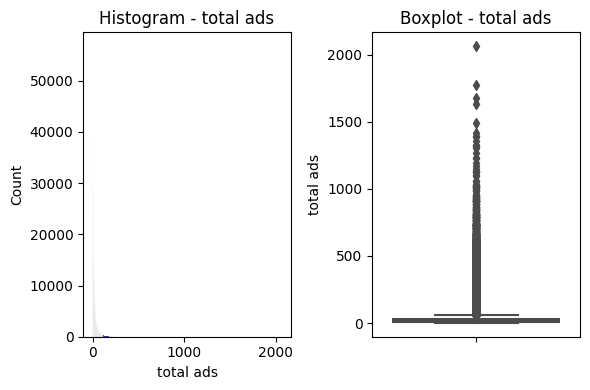

In [14]:
#Now we analyse our only numerical variable total ads

variable='total ads'

plt.figure(figsize=(6,4))
#Count plot
plt.subplot(1,2,1)
sns.histplot(df[variable].dropna(), kde=False, color='blue')
plt.title(f"Histogram - {variable}")

#Pie chart
plt.subplot(1,2,2)
sns.boxplot(y=df[variable].dropna(),color='orange')
plt.title(f'Boxplot - {variable}')

#Adjust layout 
plt.tight_layout()

#Show the plots
plt.show()

### We can see that when we draw the plot it is not suitable and visually present for analysis

In [15]:
#Lest check descriptive statistics regarding that previous two plots are not so visiable
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

### Here using desciptive statistics we determine quantiles. Our 75% is 27 and max value is 2065 so most of them are outliers so we will display only < 50 values on charts

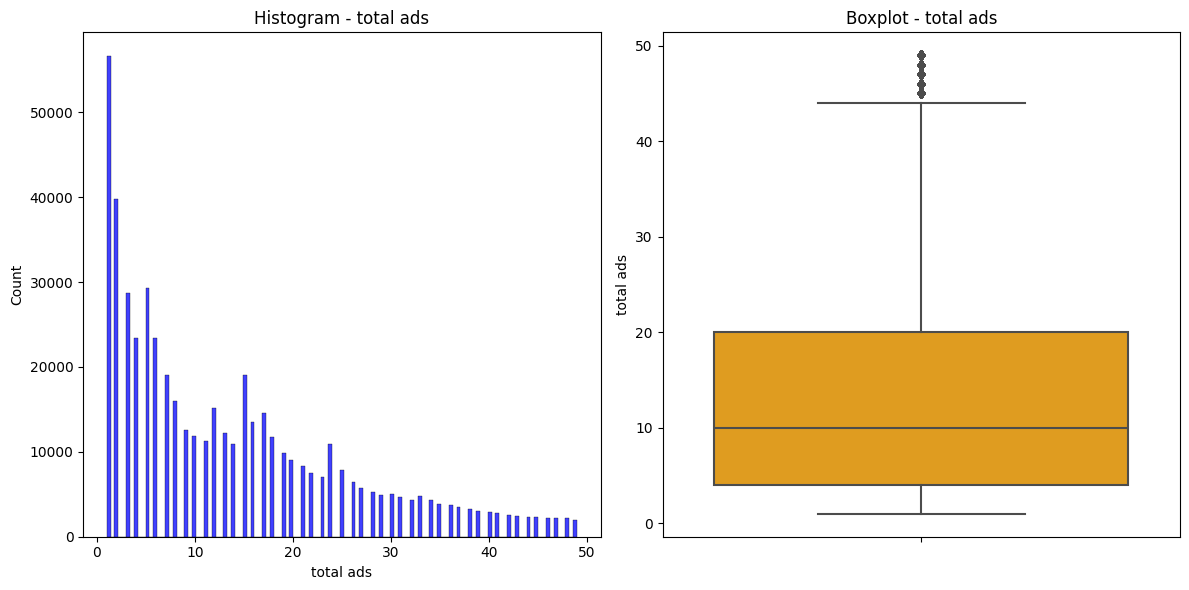

In [16]:
# We display only df['total ads'] < 50
variable = 'total ads'

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# Filtering the data for a value close to 75th percentile only for better visualization
sns.histplot(df[df[variable] < 50][variable].dropna(), kde=False, color='blue')
plt.title(f"Histogram - {variable}")

plt.subplot(1, 2, 2)
sns.boxplot(y=df[df[variable] < 50][variable].dropna(), color='orange')
plt.title(f'Boxplot - {variable}')

plt.tight_layout()

plt.show()

### We can see that median is around 10 ads but there are users that were displayed with much more ads

# Bivariate analysis

converted      False     True 
test group                    
ad          0.974453  0.025547
psa         0.982146  0.017854


<Axes: xlabel='test group'>

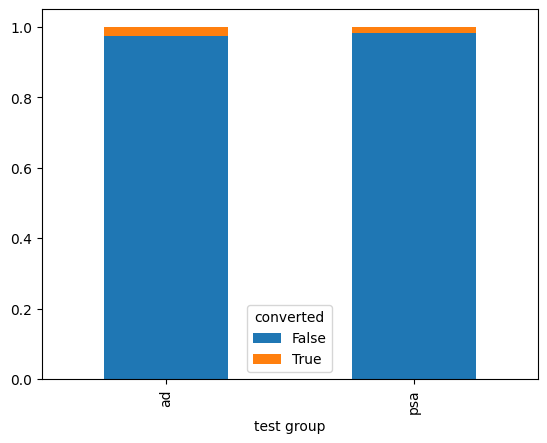

In [17]:
#Here in bivariate analysis we are goind to pair everything with the target column 'converted'
#First we compare column 'test group'
ct_conversion_test_group = pd.crosstab(df['test group'],df['converted'],normalize='index')
print(ct_conversion_test_group)
ct_conversion_test_group.plot.bar(stacked=True)

### So this mean out of all users that saw ad (advertisement) only 2.5 percent purchased product (converted True) and out of all users that saw psa (public service announcement) only 1.7 percent purchased product (converted True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

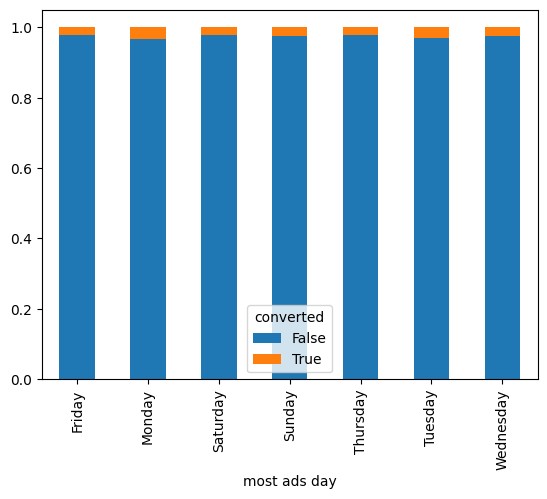

In [18]:
#Now we compare column 'most ads day'

ct_conversion_day = pd.crosstab(df['most ads day'],df['converted'],normalize='index')
print(ct_conversion_day.sort_values(by=True,ascending=False))
ct_conversion_day.plot.bar(stacked=True)

### So this means that even though users were shown ads every day, the best conversion rate (highest percentage of users who saw the ads and bought the product) was on Monday

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

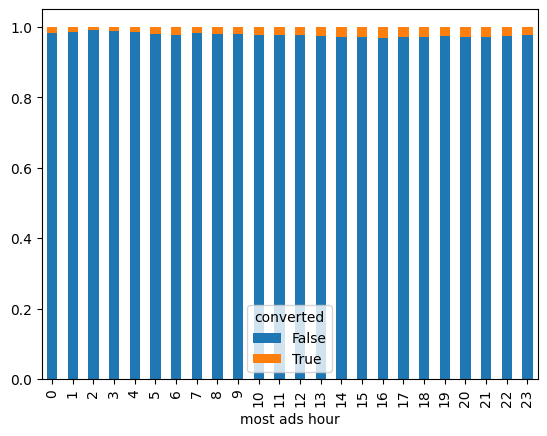

In [19]:
#Now we compare column 'most ads hour'
ct_conversion_hour = pd.crosstab(df['most ads hour'],df['converted'],normalize='index')
print(ct_conversion_hour.sort_values(by=True,ascending=False))
ct_conversion_hour.plot.bar(stacked=True)

### So this means that even though users were shown ads each hour, the best conversion rate (highest percentage of users who saw the ads and bought the product) was at noon around 16 o'clock (4PM) and at night around 20 o'clock (8PM) 

<Axes: xlabel='converted', ylabel='total ads'>

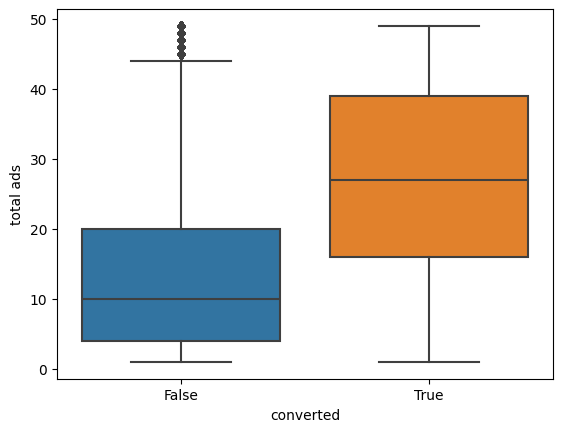

In [20]:
#No we will compare total ads with our target column and total ads is not categorical so we will not use crosstab, we will use box plot
#Again we will check for values df['total ads'] < 50 for better visualization purpose
sns.boxplot(x='converted',y='total ads', data=df[df['total ads']<50])

### When we compare group of users that bought products (orange one) with group of users that did not bought product (blue one) we can see the difference in total ads mean values (users that bought products were much more targeted with ads) 

# Statistical tests

In [21]:
#here we talk about two categorical variables and their comparing and we will perform chi2 test
#Our target variable is 'converted' and it is categorical variable,same as other columns, expect total ads, so we will compare other categorical columns with 'converted' column using chi2 test

from scipy.stats import chi2_contingency
alpha=0.05
for variable in df_cat.columns:
    if variable != 'converted':#because we do not want to see relationship of 'converted' column with itself, we want to see relationship between converted and other categorical features.
        contingency_table = pd.crosstab(df_cat[variable],df_cat['converted'])
        chi2,p,_,_=chi2_contingency(contingency_table) #this function return in order chi2 than p than degree of freedom than expected frequence. We are interested now in only first two.
        
        print(f"\nChi-squared test for {variable} vs. converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")
        
        #Check for STATISTICAL significance based on the p value
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant")
        else:
            print(f"There is no significant difference in conversion rates across {variable}")
            
        



Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant


### We can see that there is statisticaly significant difference in each of these comparision. Our p values that we are getting are much lower than 0.05 that is our choosen level of significance (we are choosing industrial standard for alpha=0.05).

### That means that conversion rate difference was significant weather the user was presented with ads, the day when they were presented with ads and time of day 

In [22]:
#Now we want to compare numerical variable (total ads) with target categorical variable(converted)
#First we need to check weather we have normal distribution in both groups, group of users that purchase product and group of users that did not purchase product
#Second we check weather both groups have equal variances

from scipy.stats import shapiro,levene, ttest_ind,mannwhitneyu

#Normality Assumptions (checked using Shapiro test)
#So one sample is total ads seen by users that converted and the other is total amount of ads seen by users that did not converted
#And on both samples we do test of normality(based on p values for both samples we will conclude weather they are normaly distributed or not)
shapiro_stats_true, shapiro_p_value_true = shapiro(df[df['converted']==True]['total ads'])
shapiro_stats_false, shapiro_p_value_false = shapiro(df[df['converted']==False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group):p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group):p-value = {shapiro_p_value_false}")

#Equality of variances assumption (we are using Levene's test)

levene_stat, levene_p_value = levene(df[df['converted']]['total ads'],df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group):p-value = 0.0
Shapiro-Wilk test for normality (False group):p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


### From p values we got we can see that non of these samples were normally distributed (p < 0.05 level of significance)
### Also their variances are not equal

In [23]:
#Step 2: Perform a Suitable Test
#It will be Mann-Whitney becuase of not normaly distributed samples (explained above)
alpha=0.05
#so if both samples are normaly distributed and if we also have equality of variances only in that case we can perform an independent two sample t-test
if shapiro_p_value_true > alpha and shapiro_p_value_false>alpha and levene_p_value>alpha:
    #Assumption met - use t-test for means
    t_stats, t_p_value=ttest_ind(df[df['converted']]['total ads'],df[~df['converted']]['total ads']) 
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
    #Assumption not met - use Mann-Whitney U test for medians (non parametric equivalent of independent two sample T test)
    u_stat,u_p_value = mannwhitneyu(df[df['converted']]['total ads'],df[~df['converted']]['total ads'])
    print(f"Mann-Whitney U test: p-value={u_p_value}")


Mann-Whitney U test: p-value=0.0


### Result is p value = 0 so conclusion is that when it come to conversion (purchasing) it does significantly influence how many ads users saw, as we also saw it visually in cell 20